# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data cleaning

In [3]:
def merged_csv_file(csv1,csv2):
    df1 = pd.read_csv(csv1)
    df2 = pd.read_csv(csv2)
    df = pd.merge(df1, df2,  how='left', left_on=['y/delta','y^+','Re_tau'], right_on = ['y/delta','y^+','Re_tau'])
    #df = df.drop(['y/delta','U','y^+','W','P','Re_tau'], axis=1)
    return df

In [4]:
df = merged_csv_file("mean_combined.csv","vel_fluc_combined.csv")
df

,y/delta,y^+,U,dU/dy,W,P,Re_tau,u'u',v'v',w'w',u'v',u'w',v'w',k
0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,5200,4.176503e-36,0.000000e+00,-4.685007e-10,0.000000e+00,-6.964740e-40,0.000000e+00,-2.342503e-10
1,0.000014,0.071102,0.071102,0.999986,-0.000011,-4.717272e-09,5200,1.005730e-03,4.711429e-09,4.434640e-04,-3.980482e-07,-8.647142e-08,6.027252e-11,7.245992e-04
2,0.000042,0.216250,0.216244,0.999947,-0.000034,-3.851045e-07,5200,9.271135e-03,3.846287e-07,3.959369e-03,-1.137182e-05,-8.119895e-07,1.722111e-09,6.615444e-03
3,0.000085,0.438384,0.438355,0.999819,-0.000069,-6.055743e-06,5200,3.792464e-02,6.048292e-06,1.542633e-02,-9.679785e-05,-3.408324e-06,1.466385e-08,2.667851e-02
4,0.000143,0.740447,0.740306,0.999379,-0.000117,-4.477271e-05,5200,1.075992e-01,4.471796e-05,4.099240e-02,-4.781457e-04,-9.973361e-06,7.246230e-08,7.431814e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691,0.924453,168.332085,18.229457,0.005679,-0.006407,-3.840753e-01,180,6.710482e-01,3.840753e-01,3.923507e-01,-6.992134e-02,1.987897e-03,-1.148241e-04,7.237371e-01
1692,0.941219,171.385008,18.244917,0.004445,-0.006349,-3.819697e-01,180,6.573929e-01,3.819697e-01,3.873618e-01,-5.435220e-02,1.855609e-03,-9.247177e-05,7.133622e-01
1693,0.958002,174.440956,18.256587,0.003189,-0.006322,-3.803884e-01,180,6.469951e-01,3.803884e-01,3.836718e-01,-3.880605e-02,1.725743e-03,-7.086049e-05,7.055277e-01
1694,0.974796,177.499065,18.264396,0.001917,-0.006324,-3.793335e-01,180,6.400011e-01,3.793335e-01,3.812476e-01,-2.327609e-02,1.628870e-03,-4.552829e-05,7.002911e-01


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1696 entries, 0 to 1695
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   y/delta  1696 non-null   float64
 1   y^+      1696 non-null   float64
 2   U        1696 non-null   float64
 3   dU/dy    1696 non-null   float64
 4   W        1696 non-null   float64
 5   P        1696 non-null   float64
 6   Re_tau   1696 non-null   int64  
 7   u'u'     1696 non-null   float64
 8   v'v'     1696 non-null   float64
 9   w'w'     1696 non-null   float64
 10  u'v'     1696 non-null   float64
 11  u'w'     1696 non-null   float64
 12  v'w'     1696 non-null   float64
 13  k        1696 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 198.8 KB


## Identify outliers for each variable

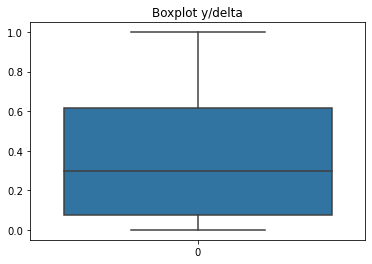

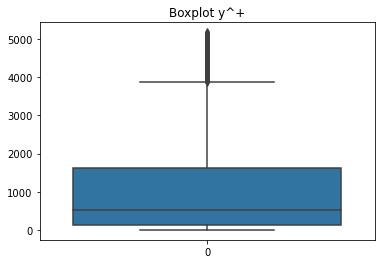

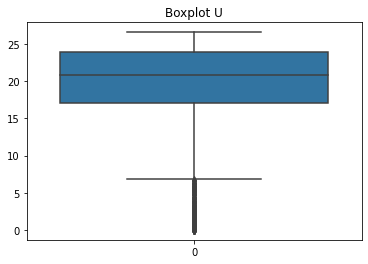

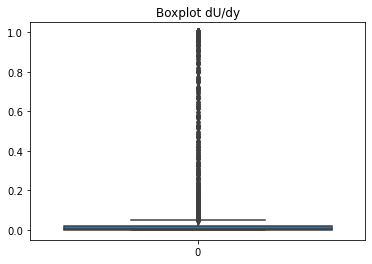

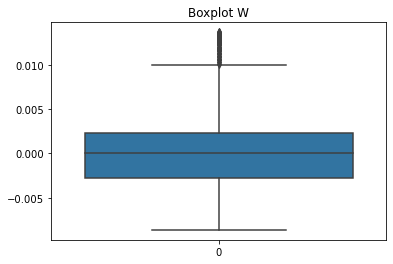

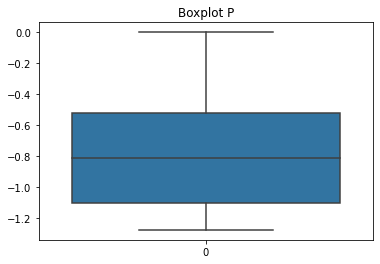

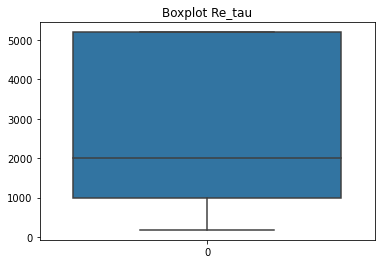

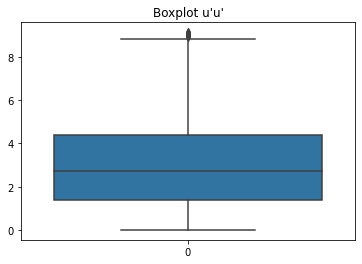

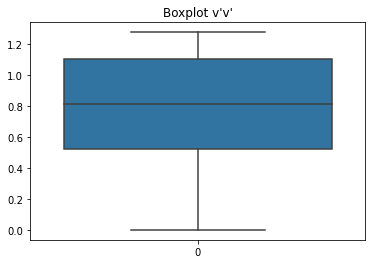

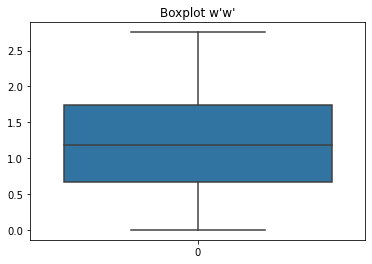

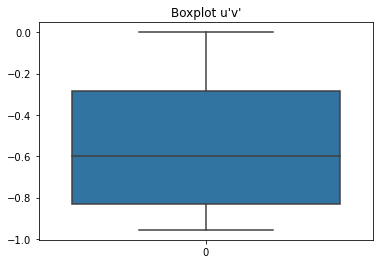

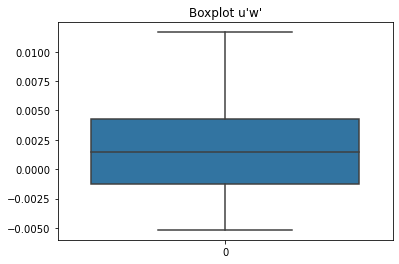

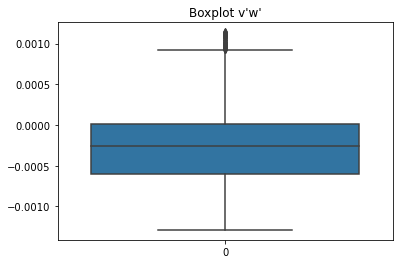

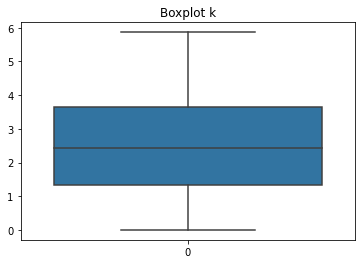

In [6]:
for column in df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df[column])
    plt.title(f"Boxplot {column}")
    plt.show()

## Remove extreme outliers for each variable

In [7]:
def remove_outliers(df):
    columns = ["y^+","U","dU/dy","W","u'u'"]
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_fence = Q1 - 3 * IQR
        upper_fence = Q3 + 3 * IQR

        df = df[(df[column] <= upper_fence) & (df[column] >= lower_fence)]
    
    return df

df = remove_outliers(df)
df.reset_index(drop=True, inplace=True)

https://www.scribbr.co.uk/stats/statistical-outliers/

In [8]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1467 entries, 0 to 1466
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   y/delta  1467 non-null   float64
 1   y^+      1467 non-null   float64
 2   U        1467 non-null   float64
 3   dU/dy    1467 non-null   float64
 4   W        1467 non-null   float64
 5   P        1467 non-null   float64
 6   Re_tau   1467 non-null   int64  
 7   u'u'     1467 non-null   float64
 8   v'v'     1467 non-null   float64
 9   w'w'     1467 non-null   float64
 10  u'v'     1467 non-null   float64
 11  u'w'     1467 non-null   float64
 12  v'w'     1467 non-null   float64
 13  k        1467 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 160.6 KB


,y/delta,y^+,U,dU/dy,W,P,Re_tau,u'u',v'v',w'w',u'v',u'w',v'w',k
0,0.007194,37.306840,14.043179,0.073700,-0.002314,-0.959060,5200,7.103153,0.958211,2.716161,-0.918212,0.000269,0.000138,5.388763
1,0.007452,38.646476,14.139232,0.069773,-0.002330,-0.980840,5200,7.006583,0.979975,2.725204,-0.921877,0.000319,0.000138,5.355881
2,0.007714,40.006557,14.231651,0.066194,-0.002346,-1.001492,5200,6.914939,1.000611,2.732887,-0.925190,0.000367,0.000139,5.324218
3,0.007981,41.387079,14.320739,0.062927,-0.002360,-1.021039,5200,6.828173,1.020141,2.739304,-0.928188,0.000413,0.000139,5.293809
4,0.008251,42.788036,14.406768,0.059940,-0.002373,-1.039507,5200,6.746199,1.038594,2.744540,-0.930902,0.000457,0.000139,5.264666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,0.924453,168.332085,18.229457,0.005679,-0.006407,-0.384075,180,0.671048,0.384075,0.392351,-0.069921,0.001988,-0.000115,0.723737
1463,0.941219,171.385008,18.244917,0.004445,-0.006349,-0.381970,180,0.657393,0.381970,0.387362,-0.054352,0.001856,-0.000092,0.713362
1464,0.958002,174.440956,18.256587,0.003189,-0.006322,-0.380388,180,0.646995,0.380388,0.383672,-0.038806,0.001726,-0.000071,0.705528
1465,0.974796,177.499065,18.264396,0.001917,-0.006324,-0.379334,180,0.640001,0.379334,0.381248,-0.023276,0.001629,-0.000046,0.700291


In [9]:
df.to_csv("data_cleaned.csv", index=False)